# 8.3.2 Recurrent Neural Network Language Model

## Explanation of Recurrent Neural Network (RNN) Language Models

Recurrent Neural Networks (RNNs) are a class of artificial neural networks designed for sequential data. Unlike traditional neural networks, RNNs have connections that form directed cycles, allowing them to maintain a 'memory' of previous inputs. This characteristic makes them particularly well-suited for tasks involving sequential data, such as natural language processing (NLP).

RNNs process inputs sequentially, maintaining a hidden state that captures information about previous words in a sentence. However, vanilla RNNs suffer from issues like vanishing and exploding gradients, which limit their ability to capture long-term dependencies. To address these issues, advanced variants like Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) were developed.

___
___
### Readings:
- [Language Models and the Dataset](https://classic.d2l.ai/chapter_recurrent-neural-networks/language-models-and-dataset.html)
- [Recurrent Neural Networks](https://frcs.github.io/4C16-LectureNotes/recurrent-neural-networks.html)
- [RNN Language Models](https://docs.chainer.org/en/stable/examples/ptb.html)
- [Recurrent Neural Networks Language Model](https://medium.com/@josephkiran2001/recurrent-neural-networks-language-model-56c14a10db41)
___
___



### Applications of RNN Language Models in NLP

RNNs and their variants (LSTMs and GRUs) are used in various NLP applications, including:

- **Language Modeling**: Predicting the next word in a sentence.
- **Text Generation**: Generating new text based on a given input.
- **Machine Translation**: Translating text from one language to another.
- **Speech Recognition**: Converting spoken language into text.
- **Sentiment Analysis**: Determining the sentiment expressed in a piece of text.

### Methods for Implementing RNN Language Models

Below is an example of how to implement an RNN using the Keas libra

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 9, 50)               │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,905 (73.85 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,604 (49.24 KB)

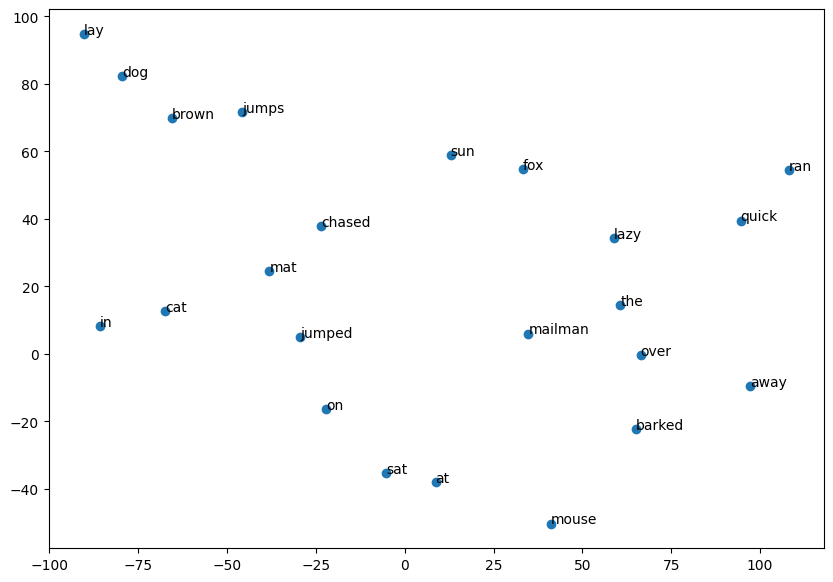

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data
texts = [
    "The quick brown fox jumps over the lazy dog",
    "The cat sat on the mat",
    "The dog barked at the mailman",
    "The quick brown fox",
    "The cat chased the mouse",
    "The dog chased the cat",
    "The mouse ran away",
    "The quick cat jumped over the lazy dog",
    "The quick brown dog",
    "The lazy dog lay in the sun"
]

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create dummy labels for illustration (binary classification)
labels = np.random.randint(2, size=(data.shape[0], 1))

# Train the model
model.fit(data, labels, epochs=10, verbose=0)

# Model summary
model.summary()

# Generate word vectors using the trained Embedding layer
embedding_layer = model.layers[0]
word_vectors = embedding_layer.get_weights()[0]

# Visualizing the word embeddings
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Extract vectors and their corresponding words
words = list(tokenizer.word_index.keys())
word_vectors = word_vectors[1:]  # skip the zero-th index (padding)

# Reduce perplexity to avoid ValueError
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1])

# Annotating the plot with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))

plt.show()


## Conclusion

Recurrent Neural Networks (RNNs) are powerful models for handling sequential data in NLP tasks. By maintaining a hidden state, RNNs can capture information from previous inputs, making them ideal for applications such as language modeling, text generation, and machine translation. Advanced variants like LSTMs and GRUs further enhance the capability of RNNs to handle long-term dependencies. Implementing RNNs using libraries like Keras allows for efficient and effective modeling of sequential data in various NLP applications.
